In [53]:
!pip install -r requirements.txt

In [60]:
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(imgdata))
    return np.array(image)

In [112]:
from google.oauth2 import service_account
import gcsfs
from PIL import Image
import io
import matplotlib.pyplot as plt
from IPython import display
from base64 import b64decode
import numpy as np

key_path = "cda-gatech-0f0f7b5092d0.json"
credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [33]:
fs = gcsfs.GCSFileSystem(project='CDA-GATECH', token=credentials)

cda-project/images/test/n/1_1_36_1_frame_0.jpg


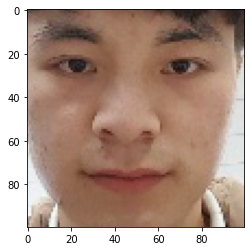

In [116]:
# Pulling negative examples - attacks
for v in fs.ls('cda-project/images/test/n')[1:]:
  if '/.' not in v:
    print(v)
    with fs.open(v) as f:
      b64 = base64.b64encode(f.read())
      plt.imshow(stringToRGB(b64))
    break # Remove to do all

cda-project/images/test/p/1_1_36_2_frame_0.jpg


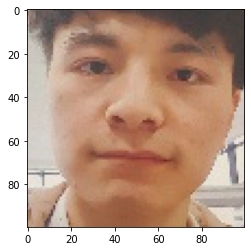

In [117]:
# Pulling positive examples - non attacks
for v in fs.ls('cda-project/images/test/p')[1:]:
  if '/.' not in v:
    print(v)
    with fs.open(v) as f:
      b64 = base64.b64encode(f.read())
      plt.imshow(stringToRGB(b64))
    break